In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the dataset

In [2]:
df = pd.read_csv("C:/Users/fys94/OneDrive/Desktop/BIOS 240C/heart_disease.csv")

In [3]:
# Look at the first few lines of dataset
df.head()

,Unnamed: 0,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# Find the initial shape
df.shape

(303, 15)

In [5]:
# Remove the first column
# Look at the shape of filter dataset
df_drop = df.drop(df.columns[0], axis=1)

# Since the missing value in the dataset is donated by "?",
# replace it with np.nan before filtering
df_replace = df_drop.replace("?", np.nan)
df_filter = df_replace.dropna(axis=0)
df_filter.shape

(297, 14)

In [6]:
# Look at first few lines of df_filter
df_filter.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
# Find the features 
features = pd.Series(df_filter.columns)
features

0                          Age
1                          Sex
2              Chest_Pain_Type
3       Resting_Blood_Pressure
4            Serum_Cholesterol
5          Fasting_Blood_Sugar
6                  Resting_ECG
7      Max_Heart_Rate_Achieved
8      Exercise_Induced_Angina
9       ST_Depression_Exercise
10    Peak_Exercise_ST_Segment
11    Num_Major_Vessels_Flouro
12                 Thalassemia
13     Diagnosis_Heart_Disease
dtype: object

C:\Users\fys94\AppData\Local\Temp\ipykernel_9956\4129757260.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df_filter.corr()), annot=True, cmap='gray')


<AxesSubplot: >

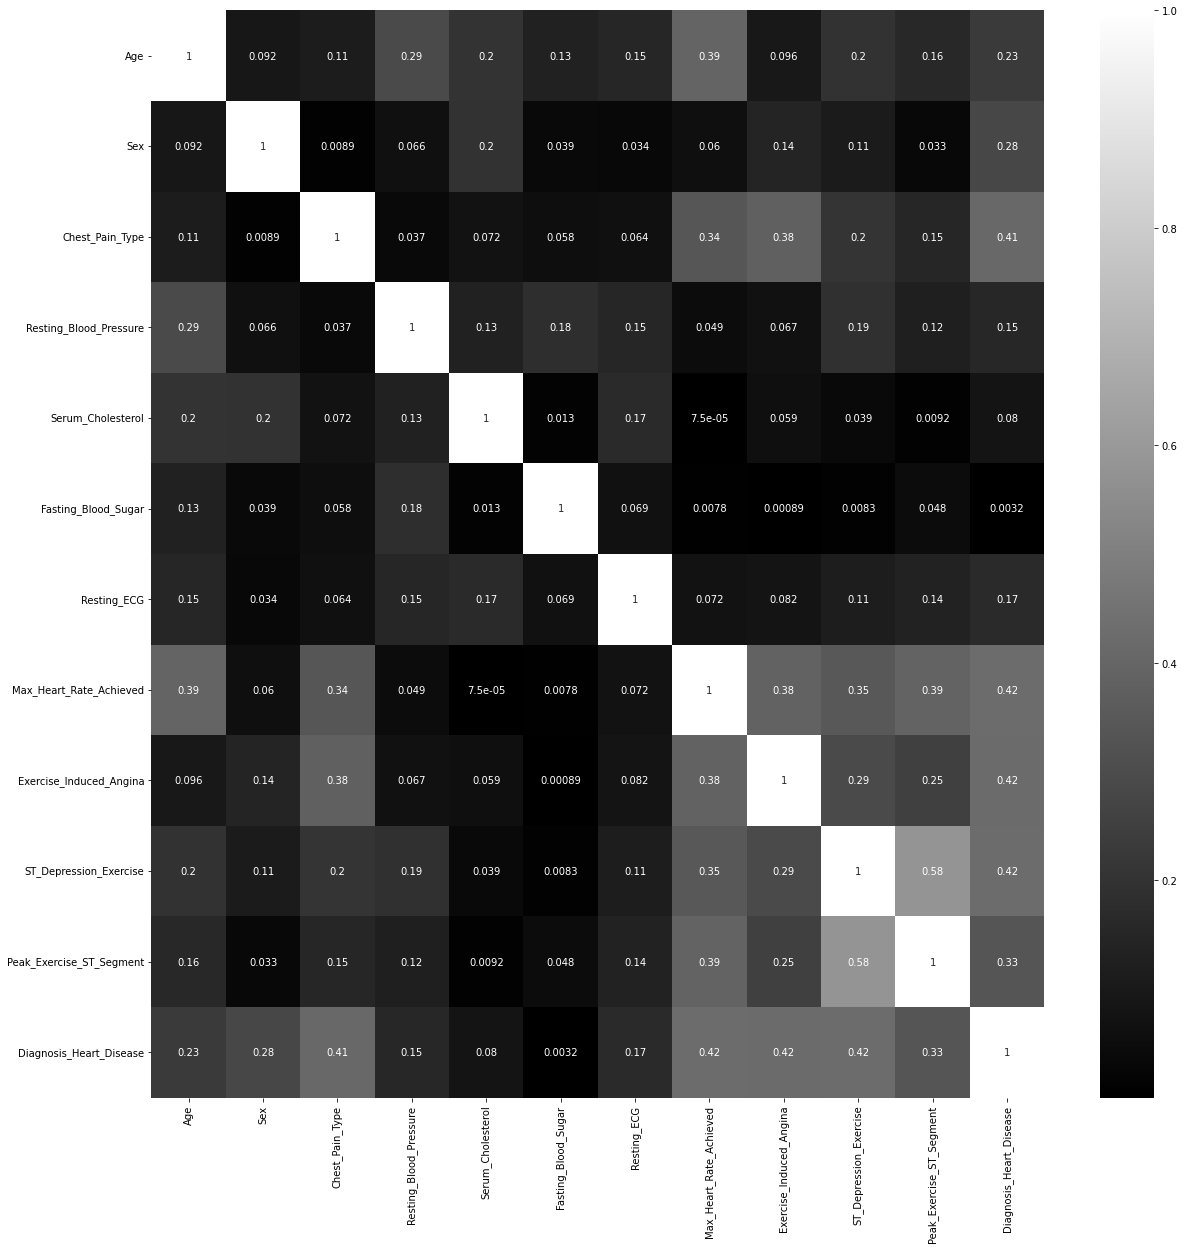

In [8]:
# Look at the correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(abs(df_filter.corr()), annot=True, cmap='gray')

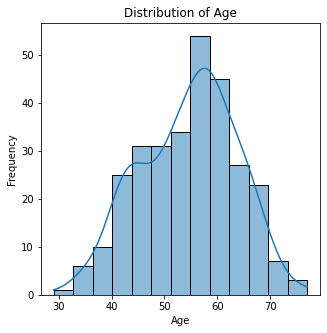

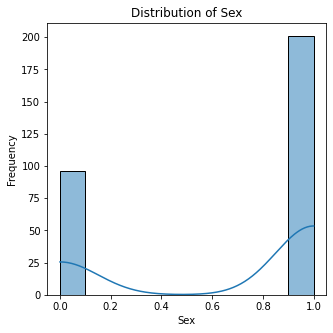

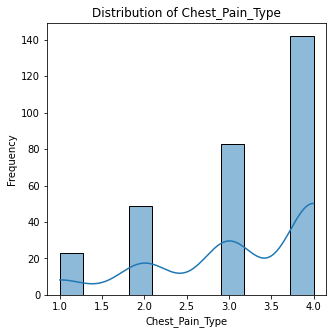

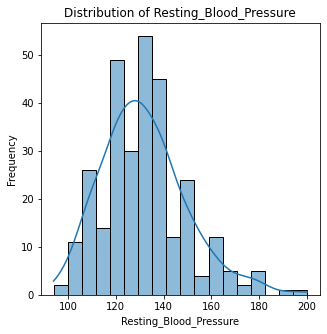

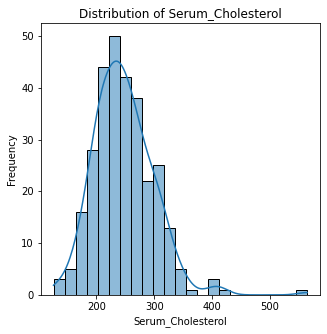

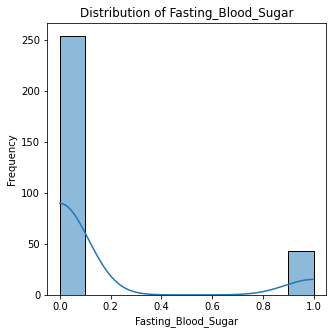

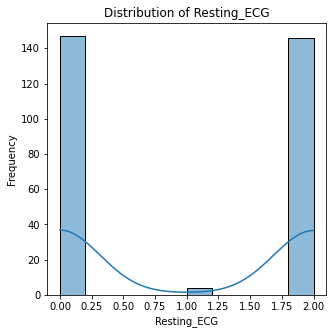

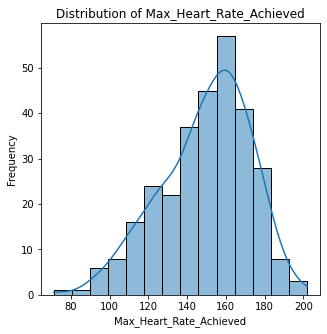

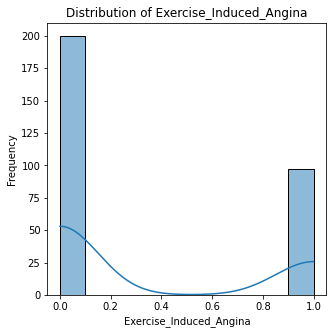

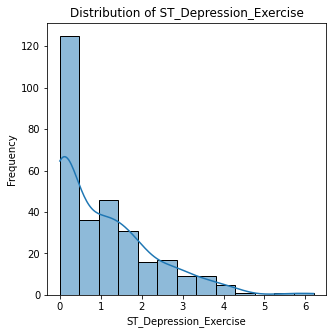

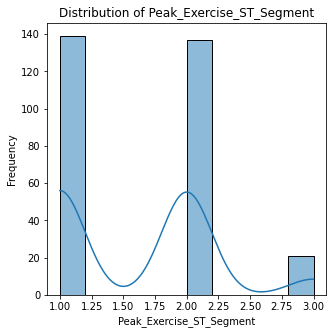

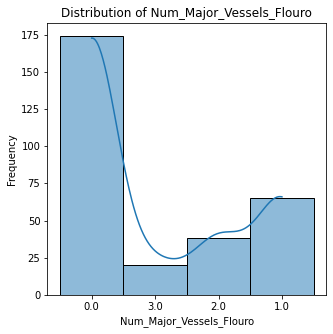

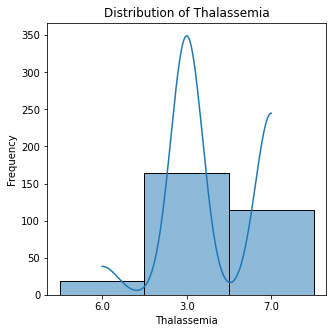

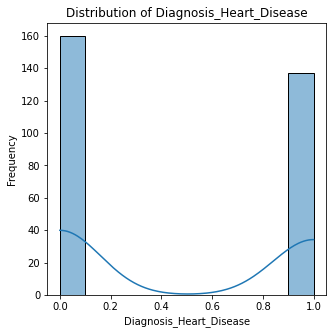

In [9]:
# Probe into the distribution of each features

# Loop through each column and create a histogram
for column in features:
    plt.figure(figsize=(5,5))
    sns.histplot(df_filter[column], kde=True)  # Use kde=True for Kernel Density Estimation
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# PCA plot



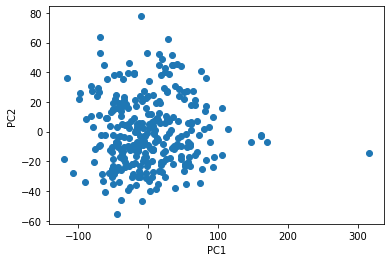

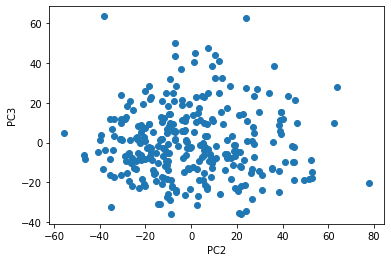

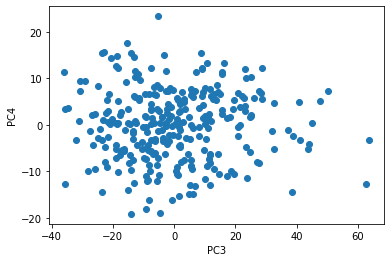

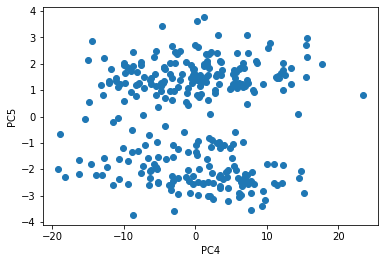

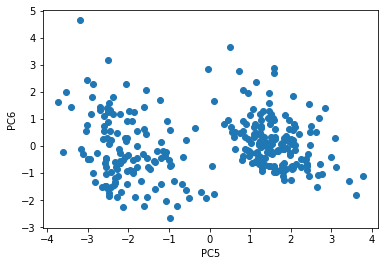

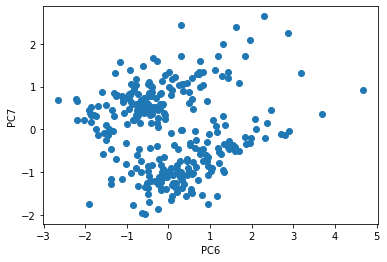

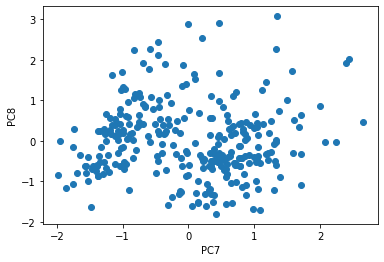

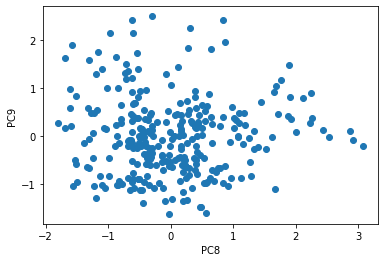

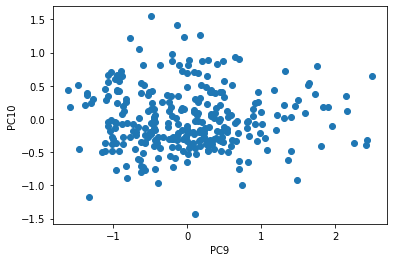

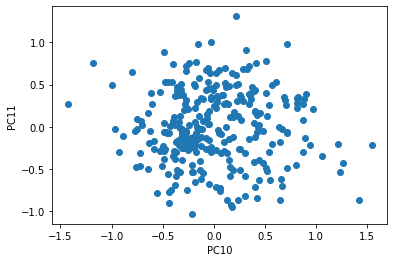

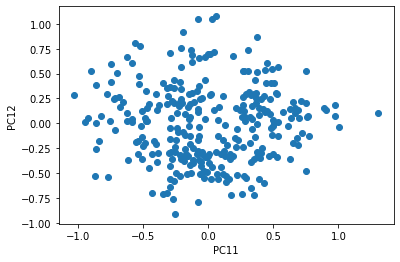

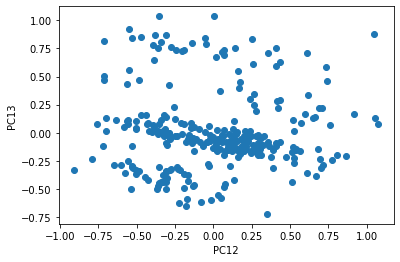

In [10]:
# Perform PCA
n_components = 13
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_filter)

# Create a new DataFrame with principal components
columns = [f'PC{i}' for i in range(1, n_components+1)]
principal_df = pd.DataFrame(data=principal_components, columns=columns)

# Plot the PCA
for i in range(n_components-1):
    plt.scatter(principal_df.iloc[:,i], principal_df.iloc[:, i+1])
    plt.xlabel(f'PC{i+1}')
    plt.ylabel(f'PC{i+2}')
    plt.show()



In [11]:
# not sure
# Access the feature loadings for each principal component
feature_loadings = pca.components_



# Split the dataset (60% training, 20% validation, 20% testing)

In [12]:
# Split dataset
# 60% training 
# 20% validation 
# 20% testing
X = df_filter.drop(columns='Diagnosis_Heart_Disease').values
y = df_filter['Diagnosis_Heart_Disease'].values
Xtrain, Xbulk, ytrain, ybulk = train_test_split(X, y, test_size=0.4, random_state=7265)
Xval, Xtest, yval, ytest = train_test_split(Xbulk, ybulk, test_size=0.5, random_state=7265)


# Random Forest

Baseline MSE, R: (0.23728813559322035, 0.037296037296037365)


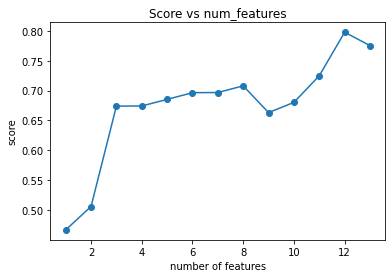

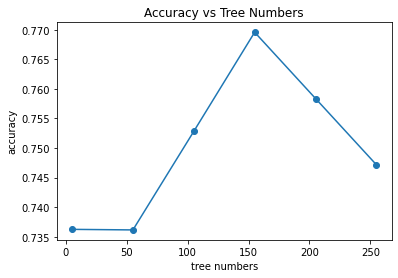

Baseline MSE, R: (0.1864406779661017, 0.2435897435897436)


In [13]:
# import random forest model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

np.random.seed(123)

#Baseline model
# Fit the Random Forest model (can modify n_estimators to see the effect)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=123)
random_forest_model.fit(Xtrain, ytrain)

# make prediction on validation dataset
rf_pred = random_forest_model.predict(Xval)

# Test the performance
MSE = mean_squared_error(yval, rf_pred)
R = r2_score(yval, rf_pred)

print(f'Baseline MSE, R: {MSE, R}')


##### Find the optimal number of features
## can be improved (find all features combinations)
## can use feature selection
feature_scores = random_forest_model.feature_importances_
feature_list = list(zip(features, feature_scores))
feature_list_sort = sorted(feature_list, key=lambda x: x[1], reverse=True) # sort based on the most important to the least important

score = []
num_feature = []
for i in range(1, len(features)):
    num_feature.append(i)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(clf, Xtrain[:,:i], ytrain, cv=3, scoring='accuracy')
    score.append(scores.mean())

plt.plot(num_feature, score, marker='o')
plt.title('Score vs num_features')
plt.xlabel('number of features')
plt.ylabel('score')
plt.show()

optimal_num_feature = 12 

##### Find optimal numbers of trees
tree_range = range(5,300,50)
acc =[]

for num in tree_range:
    clf = RandomForestClassifier(n_estimators=num, random_state=123)
    scores = cross_val_score(clf, Xtrain[:, :optimal_num_feature], ytrain, cv=3) # provide 3 scores since it's 3-fold   #not done yet need to fix the Xtrain with optimal num of features
    acc.append(scores.mean())

plt.plot(tree_range, acc, marker='o')
plt.title('Accuracy vs Tree Numbers')
plt.xlabel('tree numbers')
plt.ylabel('accuracy')
plt.show()

optimal_num_tree = 150


##### Train an optimal random forest
random_forest_model_op = RandomForestClassifier(n_estimators=150, random_state=123)
random_forest_model_op.fit(Xtrain[:, :optimal_num_feature], ytrain)

# make prediction on validation dataset
rf_pred_op = random_forest_model_op.predict(Xval[:, :optimal_num_feature])

# Test the performance
MSE_op = mean_squared_error(yval, rf_pred_op)
R_op = r2_score(yval, rf_pred_op)

print(f'Baseline MSE, R: {MSE_op, R_op}')

c:\Users\fys94\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


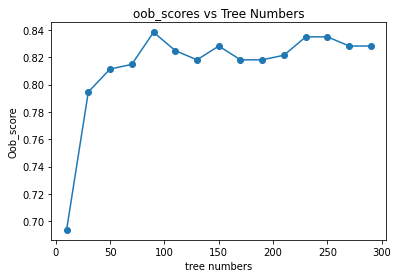

<StemContainer object of 3 artists>

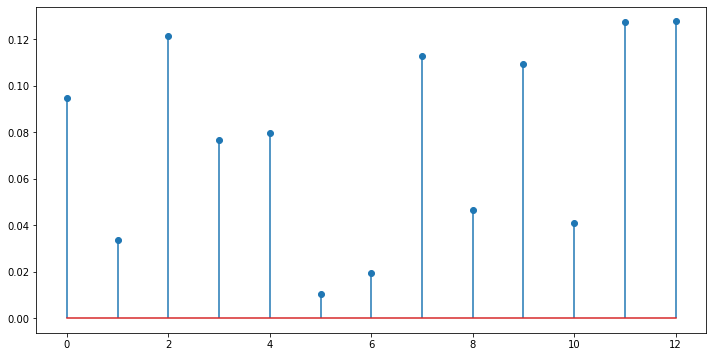

In [54]:
num_tree = range(10, 300, 20)
oob_scores = []

# Find the optimal random forest with Oob score
for i in num_tree:
    random_forest_model_2 = RandomForestClassifier(n_estimators=i, oob_score=True)
    random_forest_model_2.fit(X,y)
    oob_scores.append(random_forest_model_2.oob_score_)

plt.plot(num_tree, oob_scores, marker='o')
plt.title('oob_scores vs Tree Numbers')
plt.xlabel('tree numbers')
plt.ylabel('Oob_score')
plt.show()


# Find the important variables
plt.figure(figsize=(12,6))
plt.stem(random_forest_model_2.feature_importances_)

In [56]:
# The important features of random forest
feature_list = random_forest_model_2.feature_importances_ > 0.06
temp_df = df_filter
temp_df.drop(columns='Diagnosis_Heart_Disease').columns[feature_list]

Index(['Age', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholesterol',
       'Max_Heart_Rate_Achieved', 'ST_Depression_Exercise',
       'Num_Major_Vessels_Flouro', 'Thalassemia'],
      dtype='object')

In [15]:
# Naive bayes 
# Random Forest
# KNN

# 60% training 
# 20% validation 
# 20% testing

# 